In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import folium

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

In [2]:
#import data
data = pd.read_csv('C:/Users/bombd/Downloads/LIHTCPUB.csv')

C:\Users\bombd\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (72) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data

,hud_id,project,proj_add,proj_cty,proj_st,proj_zip,state_id,latitude,longitude,place1990,place2000,place2010,fips1990,fips2000,fips2010,st2010,cnty2010,scattered_site_cd,resyndication_cd,allocamt,n_units,li_units,n_0br,n_1br,n_2br,n_3br,n_4br,inc_ceil,low_ceil,ceilunit,yr_pis,yr_alloc,non_prof,basis,bond,mff_ra,fmha_514,fmha_515,fmha_538,home,home_amt,tcap,tcap_amt,cdbg,cdbg_amt,htf,htf_amt,fha,hopevi,hpvi_amt,tcep,tcep_amt,rad,qozf,qozf_amt,rentassist,trgt_pop,trgt_fam,trgt_eld,trgt_dis,trgt_hml,trgt_other,trgt_spc,type,credit,n_unitsr,li_unitr,metro,dda,qct,nonprog,nlm_reason,nlm_spc,datanote,record_stat
0,AKA0000X018,"GATEWAY-SEWARD ASSOCIATES, LTD PTN",1810 PHOENIX ROAD,SEWARD,AK,99664,AK-99-99,60.125469,-149.446060,NaN,NaN,68560.0,02XXXXXXXXX,02XXXXXXXXX,02122001300,2,122,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,9999,9999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X
1,AKA0000X034,YENLO PHASE I AND II,402-451 NORTH YENLO STREET,WASILLA,AK,99654,AK-99-99,61.583096,-149.437637,NaN,NaN,83080.0,02XXXXXXXXX,02XXXXXXXXX,02170000800,2,170,NaN,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,9999,9999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,37.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
2,AKA19890010,PARK WEST APTS,2012 SANDVIK ST,FAIRBANKS,AK,99709,AK-89-00001,64.851646,-147.803421,1080.0,16750.0,16750.0,02090000600,02090000600,02090000600,2,90,2.0,NaN,NaN,83.0,81.0,0.0,41.0,42.0,0.0,0.0,NaN,NaN,NaN,1989,1989.0,2.0,2.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,83.0,81.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,X
3,AKA19900005,TYSON'S TERRACE,103 BURKHART DR,SITKA,AK,99835,AK-90-00001,57.048874,-135.303024,3040.0,70540.0,70540.0,02220967500,02220000100,02220000100,2,220,2.0,NaN,NaN,16.0,16.0,0.0,16.0,0.0,0.0,0.0,NaN,NaN,NaN,1990,1990.0,2.0,2.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,16.0,16.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,X
4,AKA19910005,NORTHWOOD APTS,190 PARKWOOD CIR,SOLDOTNA,AK,99669,AK-91-00001,60.489147,-151.073853,2810.0,65345.0,71640.0,02122953200,02122000500,02122000500,2,122,2.0,NaN,NaN,23.0,22.0,0.0,23.0,0.0,0.0,0.0,NaN,NaN,NaN,1991,1991.0,2.0,2.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,23.0,22.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52002,WYA20200001,CONVERSE PLACE APARTMENTS,5807 CONVERSE AVENUE,CHEYENNE,WY,82009,NaN,41.188232,-104.789665,NaN,NaN,63800.0,56XXXXXXXXX,56XXXXXXXXX,56021001402,56,21,2.0,NaN,0.0,72.0,72.0,0.0,12.0,40.0,20.0,0.0,2.0,NaN,NaN,2020,9999.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,1.0,2.0,72.0,72.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,X
52003,WYA20200002,SHERIDAN SQUARE,200 SMITH STREET,SHERIDAN,WY,82414,NaN,44.798897,-106.958618,NaN,NaN,69845.0,56XXXXXXXXX,56XXXXXXXXX,56033000300,56,33,2.0,NaN,0.0,75.0,75.0,0.0,69.0,6.0,0.0,0.0,2.0,NaN,NaN,2020,2019.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,1.0,75.0,75.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,U
52004,WYA20210001,BITTER CREEK APARTMENTS,434 HUGUS STREET,RAWLINS,WY,82301,WY-20-699,41.783085,-107.226608,NaN,NaN,63900.0,56XXXXXXXXX,56XXXXXXXXX,56007967700,56,7,2.0,NaN,0.0,38.0,38.0,0.0,10.0,27.0,1.0,0.0,2.0,NaN,NaN,2021,9999.0,2.0,2.0,NaN,2.0,NaN,2.0,NaN,2.

In [4]:
#Create dataframe with isolated attributes
tempdf=data[['yr_pis','latitude','longitude','proj_cty']].dropna()
tempdf
#filter by failures. Failures = 8888

filtered_df = tempdf[tempdf['yr_pis'] == 8888]

#filter to Orlando

orlando_filter = filtered_df[filtered_df['proj_cty']=="ORLANDO"]

orlando_filter

,yr_pis,latitude,longitude,proj_cty
8551,8888,28.480059,-81.442039,ORLANDO
8613,8888,28.557657,-81.479645,ORLANDO
8625,8888,28.521755,-81.391136,ORLANDO
8635,8888,28.525324,-81.458908,ORLANDO
8646,8888,28.606722,-81.435089,ORLANDO


In [6]:
#Create map
m = folium.Map(location=[28.538336, -81.379234], zoom_start=12)

for index, row in orlando_filter.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    popup = f"Year: {row['yr_pis']} - Location: {latitude}, {longitude}"
    marker = folium.Marker(location=[latitude, longitude], popup=popup)
    marker.add_to(m)
m

## Failure Characteristics EDA

### What features cluster most with a failure classification?



In [34]:
failuredf = pd.read_csv('C:/Users/bombd/Downloads/LIHTCPUB_Null removed.csv')
failuredf

,hud_id,project,proj_add,proj_cty,proj_st,proj_zip,state_id,latitude,longitude,place1990,place2000,place2010,fips1990,fips2000,fips2010,st2010,cnty2010,scattered_site_cd,resyndication_cd,allocamt,n_units,li_units,n_0br,n_1br,n_2br,n_3br,n_4br,inc_ceil,low_ceil,ceilunit,yr_pis,yr_alloc,non_prof,basis,bond,mff_ra,fmha_514,fmha_515,fmha_538,home,home_amt,tcap,tcap_amt,cdbg,cdbg_amt,htf,htf_amt,fha,hopevi,hpvi_amt,tcep,tcep_amt,rad,qozf,qozf_amt,rentassist,trgt_pop,trgt_fam,trgt_eld,trgt_dis,trgt_hml,trgt_other,trgt_spc,type,credit,n_unitsr,li_unitr,metro,dda,qct,nonprog,nlm_reason,nlm_spc,datanote,record_stat
0,AKA19890010,PARK WEST APTS,2012 SANDVIK ST,FAIRBANKS,AK,99709,AK-89-00001,64.851646,-147.803421,1080.0,16750.0,16750.0,2090000600,2090000600,2090000600,2,90,2.0,NaN,NaN,83.0,81.0,0.0,41.0,42.0,0.0,0.0,NaN,NaN,NaN,1989,1989.0,2.0,2.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,83,81,1.0,NaN,2.0,NaN,NaN,NaN,NaN,X
1,AKA19900005,TYSON'S TERRACE,103 BURKHART DR,SITKA,AK,99835,AK-90-00001,57.048874,-135.303024,3040.0,70540.0,70540.0,2220967500,2220000100,2220000100,2,220,2.0,NaN,NaN,16.0,16.0,0.0,16.0,0.0,0.0,0.0,NaN,NaN,NaN,1990,1990.0,2.0,2.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,16,16,1.0,NaN,2.0,NaN,NaN,NaN,NaN,X
2,AKA19910005,NORTHWOOD APTS,190 PARKWOOD CIR,SOLDOTNA,AK,99669,AK-91-00001,60.489147,-151.073852,2810.0,65345.0,71640.0,2122953200,2122000500,2122000500,2,122,2.0,NaN,NaN,23.0,22.0,0.0,23.0,0.0,0.0,0.0,NaN,NaN,NaN,1991,1991.0,2.0,2.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,23,22,1.0,NaN,2.0,NaN,NaN,NaN,NaN,X
3,AKA19930005,CHINOOK VILLA,1200 S CENTURY CIR,WASILLA,AK,99654,AK-93-00001,61.569851,-149.449509,NaN,83080.0,83080.0,2170975100,2170000900,2170000900,2,170,2.0,NaN,NaN,32.0,31.0,0.0,32.0,0.0,0.0,0.0,NaN,NaN,NaN,1993,1993.0,2.0,2.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,32,31,2.0,NaN,2.0,NaN,NaN,NaN,NaN,X
4,AKA19930010,STRASBAUGH PLACE,231 GASTINEAU AVE,JUNEAU,AK,99801,AK-92-00001,58.299683,-134.402664,1510.0,36400.0,36400.0,2110976900,2110000500,2110000500,2,110,2.0,NaN,NaN,7.0,7.0,3.0,2.0,2.0,0.0,0.0,NaN,NaN,NaN,1993,1992.0,1.0,2.0,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,7,7,1.0,NaN,2.0,NaN,NaN,NaN,NaN,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40302,WYA20200001,CONVERSE PLACE APARTMENTS,5807 CONVERSE AVENUE,CHEYENNE,WY,82009,NaN,41.188232,-104.789665,NaN,NaN,63800.0,56XXXXXXXXX,56XXXXXXXXX,56021001402,56,21,2.0,NaN,0.0,72.0,72.0,0.0,12.0,40.0,20.0,0.0,2.0,NaN,NaN,2020,9999.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,1.0,2.0,72,72,1.0,0.0,2.0,NaN,NaN,NaN,NaN,X
40303,WYA20200002,SHERIDAN SQUARE,200 SMITH STREET,SHERIDAN,WY,82414,NaN,44.798897,-106.958618,NaN,NaN,69845.0,56XXXXXXXXX,56XXXXXXXXX,56033000300,56,33,2.0,NaN,0.0,75.0,75.0,0.0,69.0,6.0,0.0,0.0,2.0,NaN,NaN,2020,2019.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,1.0,75,75,1.0,0.0,2.0,NaN,NaN,NaN,NaN,U
40304,WYA20210001,BITTER CREEK APARTMENTS,434 HUGUS STREET,RAWLINS,WY,82301,WY-20-699,41.783085,-107.226608,NaN,NaN,63900.0,56XXXXXXXXX,56XXXXXXXXX,56007967700,56,7,2.0,NaN,0.0,38.0,38.0,0.0,10.0,27.0,1.0,0.0,2.0,NaN,NaN,2021,9999.0,2.0,2.0,NaN,2.0,NaN,2.0,NaN,2.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,

In [36]:
#Filter to failures

filtered_df = failuredf[failuredf['yr_pis'] == 8888]
filtered_df

,hud_id,project,proj_add,proj_cty,proj_st,proj_zip,state_id,latitude,longitude,place1990,place2000,place2010,fips1990,fips2000,fips2010,st2010,cnty2010,scattered_site_cd,resyndication_cd,allocamt,n_units,li_units,n_0br,n_1br,n_2br,n_3br,n_4br,inc_ceil,low_ceil,ceilunit,yr_pis,yr_alloc,non_prof,basis,bond,mff_ra,fmha_514,fmha_515,fmha_538,home,home_amt,tcap,tcap_amt,cdbg,cdbg_amt,htf,htf_amt,fha,hopevi,hpvi_amt,tcep,tcep_amt,rad,qozf,qozf_amt,rentassist,trgt_pop,trgt_fam,trgt_eld,trgt_dis,trgt_hml,trgt_other,trgt_spc,type,credit,n_unitsr,li_unitr,metro,dda,qct,nonprog,nlm_reason,nlm_spc,datanote,record_stat
1553,AZA00000095,MESA PARK APTS,604 W EIGHTH AVE,MESA,AZ,85210,TC-0142,33.400684,-111.845062,215.0,46000.0,46000.0,4013422106,4013422106,4013422106,4,13,2.0,NaN,NaN,140.0,98.0,0.0,0.0,28.0,112.0,0.0,NaN,NaN,NaN,8888,8888.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140,98,2.0,NaN,NaN,1.0,NaN,NaN,PREVIOUSLY LISTED AS AZA0000519.,X
6545,CTA00000015,887-901 PARK STREET LTD,887 PARK ST,HARTFORD,CT,6106,NaN,41.757980,-72.692047,970.0,37000.0,37000.0,9003502900,9003502900,9003502900,9,3,2.0,NaN,NaN,15.0,15.0,0.0,3.0,12.0,0.0,0.0,2.0,NaN,NaN,8888,8888.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,2.0,NaN,NaN,NaN,NaN,NaN,NaN,X
6546,CTA00000030,ARMORY COURT,10 GRAND ST,NEW BRITAIN,CT,6052,NaN,41.662014,-72.783257,1390.0,50370.0,50370.0,9003415700,9003415700,9003415700,9,3,2.0,NaN,NaN,26.0,NaN,0.0,6.0,16.0,4.0,0.0,2.0,NaN,NaN,8888,8888.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,26,1.0,NaN,NaN,NaN,NaN,NaN,NaN,X
6547,CTA00000040,CEDAR ASSOC,106 W CEDAR ST,NORWALK,CT,6854,NaN,41.105183,-73.430550,1630.0,55990.0,55990.0,9001043800,9001043800,9001043800,9,1,2.0,NaN,NaN,40.0,40.0,0.0,0.0,27.0,13.0,0.0,2.0,NaN,NaN,8888,8888.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,40,2.0,NaN,NaN,NaN,NaN,NaN,NaN,X
6548,CTA00000045,CONGRESS STREET HISTORIC,10 CONGRESS ST,HARTFORD,CT,6114,NaN,41.755203,-72.675919,970.0,37000.0,37000.0,9003500300,9003500300,9003500300,9,3,2.0,NaN,NaN,42.0,42.0,6.0,0.0,19.0,17.0,0.0,2.0,NaN,NaN,8888,8888.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,42,2.0,NaN,NaN,NaN,NaN,NaN,NaN,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34353,TXA0000X103,VILLA VERDE ESTATES,2601 S. BORDER AVE.,WESLACO,TX,78596,TX5213,26.130207,-97.998352,NaN,NaN,75626.0,48XXXXXXXXX,48215022600,48215022300,48,215,2.0,2.0,NaN,132.0,112.0,0.0,46.0,66.0,20.0,0.0,2.0,1.0,35.0,8888,2016.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,2.0,NaN,0.0,4.0,1.0,2.0,2.0,2.0,2.0,1.0,Total Special Needs,1.0,2.0,132,112,1.0,NaN,NaN,NaN,NaN,NaN,NaN,U
34354,TXA0000X104,VILLAGES AT FISKVILLE,10017 MIDDLE FISKVILLE ROAD,AUSTIN,TX,78753,TX5248,30.363913,-97.682297,NaN,5000.0,5000.0,48XXXXXXXXX,48453001833,48453001833,48,453,2.0,2.0,NaN,172.0,172.0,0.0,58.0,114.0,0.0,0.0,2.0,NaN,NaN,8888,2016.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,2.0,NaN,0.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,172,172,1.0,NaN,NaN,NaN,NaN,NaN,NaN,U
34355,TXA0000X106,WHITEHOUSE SENIOR VILLAGE,201 LEAMINGTON SPA ROAD,WHITEHOUSE,TX,75791,TX5224,32.214382,-95.223732,NaN,NaN,78388.0,48XXXXXXXXX,48423002009,48423002200,48,423,2.0,2.0,NaN,72.0,56.0,0.0,56.0,16.0,0.0,0.0,2.0,1.0,17.0,8888,2016.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.

In [115]:
#Select relevant attributes
tempdf = filtered_df[['yr_pis', 'proj_zip', 'cnty2010', 'n_units', 'n_0br', 'n_1br', 'n_2br', 'n_3br', 'n_4br', 'qct', 'nlm_reason']]
tempdf

,yr_pis,proj_zip,cnty2010,n_units,n_0br,n_1br,n_2br,n_3br,n_4br,qct,nlm_reason
1553,8888,85210,13,140.0,0.0,0.0,28.0,112.0,0.0,NaN,NaN
6545,8888,6106,3,15.0,0.0,3.0,12.0,0.0,0.0,NaN,NaN
6546,8888,6052,3,26.0,0.0,6.0,16.0,4.0,0.0,NaN,NaN
6547,8888,6854,1,40.0,0.0,0.0,27.0,13.0,0.0,NaN,NaN
6548,8888,6114,3,42.0,6.0,0.0,19.0,17.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
34353,8888,78596,215,132.0,0.0,46.0,66.0,20.0,0.0,NaN,NaN
34354,8888,78753,453,172.0,0.0,58.0,114.0,0.0,0.0,NaN,NaN
34355,8888,75791,423,72.0,0.0,56.0,16.0,0.0,0.0,NaN,NaN
37171,8888,NaN,.,48.0,0.0,0.0,10.0,25.0,12.0,NaN,NaN


# EDA

In [118]:

# List of columns to convert to float
columns_to_convert = ['proj_zip', 'cnty2010', 'n_units', 'n_0br', 'n_1br', 'n_2br', 'n_3br', 'n_4br', 'qct', 'nlm_reason']

# Use pd.to_numeric to convert the specified columns to float
tempdf[columns_to_convert] = tempdf[columns_to_convert].apply(pd.to_numeric, errors='coerce').astype('Int64')



TypeError: object of type 'method' has no len()

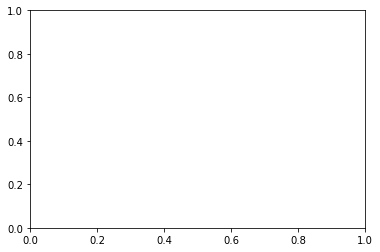

In [126]:
#Histogram


In [123]:
#correlation

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [125]:
correlation_matrix = np.corrcoef(tempdf, rowvar=False)

# Create a DataFrame from the correlation matrix
correlation_matrix_df = pd.tempdf(correlation_matrix, columns=tempdf.columns, index=tempdf.columns)

# Display or visualize the correlation matrix
print(correlation_matrix_df)

TypeError: unsupported operand type(s) for /: 'method' and 'int'

Cluster Analysis

In [95]:
#cluster analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [96]:
#select features for cluster
X = tempdf[[ 'n_units', 'n_0br', 'n_1br', 'n_2br', 'n_3br', 'n_4br', 'qct']] 
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [97]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the within-cluster sum of squares to identify the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').